In [2]:
%run helpers.ipynb
import nba_api
from nba_api.stats.endpoints import playercareerstats, boxscorescoringv2, leaguegamefinder
from nba_api.stats.endpoints import commonteamroster
from nba_api.stats.static import players,teams

init = False


# Get the data loaded 

In [3]:
def get_rosters(teams):
    roster_list = []
    for team in teams:
        print(team)
        roster = commonteamroster.CommonTeamRoster(season=SEASON, 
        team_id=team, timeout=100)
        time.sleep(.600)
        roster_list.append(roster.get_data_frames()[0])
    return roster_list




#fixed. These are live calls. only calling onces
if init == False:
    init = True
    #games for this season and last
    games_2022 = leaguegamefinder.LeagueGameFinder(season_nullable=SEASON, season_type_nullable='Regular Season', league_id_nullable=LEAGUE)
    games_2021 = leaguegamefinder.LeagueGameFinder(season_nullable='2021-22', season_type_nullable='Regular Season')
    team_list = teams.get_teams()
    team_df = pd.DataFrame.from_dict(team_list)

    player_list = players.get_active_players()
    player_df = pd.DataFrame.from_dict(player_list)

    roster_list = get_rosters(team_df['id'])

roster_list[0].head()

1610612737
1610612738
1610612739
1610612740
1610612741
1610612742
1610612743
1610612744
1610612745
1610612746
1610612747
1610612748
1610612749
1610612750
1610612751
1610612752
1610612753
1610612754
1610612755
1610612756
1610612757
1610612758
1610612759
1610612760
1610612761
1610612762
1610612763
1610612764
1610612765
1610612766


,TeamID,SEASON,LeagueID,PLAYER,NICKNAME,PLAYER_SLUG,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID,HOW_ACQUIRED
0,1610612737,2022,00,Frank Kaminsky,Frank,frank-kaminsky,0,F-C,7-0,240,"APR 04, 1993",29.0,7,Wisconsin,1626163,Signed on 07/11/22
1,1610612737,2022,00,Jalen Johnson,Jalen,jalen-johnson,1,F,6-8,219,"DEC 18, 2001",21.0,1,Duke,1630552,#20 Pick in 2021 Draft
2,1610612737,2022,00,Trent Forrest,Trent,trent-forrest,2,G,6-4,210,"JUN 12, 1998",24.0,2,Florida State,1630235,Signed on 08/08/22
3,1610612737,2022,00,Aaron Holiday,Aaron,aaron-holiday,3,G,6-0,185,"SEP 30, 1996",26.0,4,UCLA,1628988,Signed on 07/06/22
4,1610612737,2022,00,Dejounte Murray,Dejounte,dejounte-murray,5,G,6-5,180,"SEP 19, 1996",26.0,5,Washington,1627749,Traded from SAS on 06/30/22


In [4]:
#append current team to the list. Only run this once.
print(player_df.head())
#i dont need to do this 
#team_df = find_team(player_df, roster_list)

        id         full_name first_name last_name  is_active
0  1630173  Precious Achiuwa   Precious   Achiuwa       True
1   203500      Steven Adams     Steven     Adams       True
2  1628389       Bam Adebayo        Bam   Adebayo       True
3  1630534      Ochai Agbaji      Ochai    Agbaji       True
4  1630583      Santi Aldama      Santi    Aldama       True


# Get all games and players in each game.

In [5]:

#games_2022 = leaguegamefinder.LeagueGameFinder(season_nullable=SEASON, season_type_nullable='Regular Season', league_id_nullable=LEAGUE)

games = games_2022.get_data_frames()[0].sort_values(by='GAME_DATE', ascending=True)


def combine_data(df):
    '''This function takes the games dataframe and combines teams
    and home/away data into one dataframe. Dont laugh at my stupid methods'''

    #just get home and away
    x = lambda t: True if '@' not in t else False
    home = [x(match) for match in df['MATCHUP']]
    df['HOME'] = home
    df.set_index('GAME_ID', inplace=True)
    df.dropna(subset=['WL'], inplace=True)

    #inefficiently make home and away stats
    team_cols =  list(df.iloc[:,1:4].columns) + list(df.iloc[:,8:-1].columns)
    home = df[df['HOME'] == True]
    #home.set_index('GAME_ID', inplace=True)
    home = home[team_cols].copy()
    home.columns = ['H_' + x for x in home.columns]

    away = df[df['HOME'] == False]
    #away.set_index('GAME_ID', inplace=True)
    away = away[team_cols + ['WL']].copy()
    away.columns = ['A_' + x for x in away.columns[:-1]] + ['WL']

    #merge this together again
    matchup_df = home.join(away, how='outer')

    return matchup_df


matchups = combine_data(games)
matchups


#game1 = boxscorescoringv2.BoxScoreScoringV2(game_id='0021900001')
#game1.get_data_frames()[0]

,H_TEAM_ID,H_TEAM_ABBREVIATION,H_TEAM_NAME,H_PTS,H_FGM,H_FGA,H_FG_PCT,H_FG3M,H_FG3A,H_FG3_PCT,...,A_OREB,A_DREB,A_REB,A_AST,A_STL,A_BLK,A_TOV,A_PF,A_PLUS_MINUS,WL
GAME_ID,,,,,,,,,,,,,,,,,,,,,
0022200001,1610612738,BOS,Boston Celtics,126,46,82,0.561,12,35,0.343,...,4,27,31,16,8,3,14,25,-9.0,L
0022200002,1610612744,GSW,Golden State Warriors,123,45,99,0.455,16,45,0.356,...,9,39,48,23,12,4,21,18,-14.0,L
0022200003,1610612765,DET,Detroit Pistons,113,40,94,0.426,14,38,0.368,...,10,38,48,21,5,5,18,24,-4.0,L
0022200004,1610612754,IND,Indiana Pacers,107,39,97,0.402,15,42,0.357,...,14,39,53,21,5,10,16,19,7.0,W
0022200005,1610612737,ATL,Atlanta Hawks,117,45,90,0.500,7,25,0.280,...,15,39,54,25,4,3,15,20,-10.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0022200613,1610612761,TOR,Toronto Raptors,132,45,91,0.495,20,44,0.455,...,6,28,34,33,6,4,9,19,-12.0,L
0022200614,1610612762,UTA,Utah Jazz,116,38,87,0.437,10,36,0.278,...,7,30,37,18,7,7,5,25,-2.0,L
0022200615,1610612744,GSW,Golden State Warriors,113,37,96,0.385,18,48,0.375,...,19,38,57,26,5,7,21,22,12.0,W


# Lets model this. 
Preprocess by removing all categoricals EXCEPT WL which will be ordinal

In [6]:
#imports included temp to prevent init from running again
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


#column selectors 
categorical_cols = [c for c in matchups.columns if matchups[c].nunique() < 2 and 
                        matchups[c].dtype == "object"]

# Select numerical columns. Get rid of teamIDs
numerical_cols = [c for c in matchups.columns if matchups[c].dtype in ['int64', 'float64']]
numerical_cols = [c for c in numerical_cols if c not in ['H_TEAM_ID', 'A_TEAM_ID']]

#transformers. Not needed here keeping in imputer for future
numerical_transf = StandardScaler()

#pipeline to do both
categorical_transf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

preprocess = ColumnTransformer(transformers=[
    ('num', numerical_transf, numerical_cols),
    ('cat', categorical_transf, categorical_cols)

])

cols = numerical_cols + categorical_cols

oe = OrdinalEncoder()
matchups['WL'] = oe.fit_transform(matchups[['WL']])
leak_cols = ['A_PLUS_MINUS','H_PLUS_MINUS','A_FG3M', 'A_FG3A','A_FTM',
 'A_FGM','A_FGA','H_PTS', 'H_FGM','H_FGA','H_FG3M', 'H_FG3A'
 ,'H_FTA','H_PLUS_MINUS','H_FGM','H_FGA','H_FG3M', 'H_FG3A','A_PTS']
leak_cols = ['A_PLUS_MINUS','H_PLUS_MINUS','A_FG3M', 'A_FG3A','A_FTM',
  'H_FGM','H_FGA','H_FG3M', 'H_FG3A'
 ,'H_FTA','H_PLUS_MINUS','H_FGM','H_FGA','H_FG3M', 'H_FG3A','A_PTS','A_FGM','A_FGA']
matchups.head()


,H_TEAM_ID,H_TEAM_ABBREVIATION,H_TEAM_NAME,H_PTS,H_FGM,H_FGA,H_FG_PCT,H_FG3M,H_FG3A,H_FG3_PCT,...,A_OREB,A_DREB,A_REB,A_AST,A_STL,A_BLK,A_TOV,A_PF,A_PLUS_MINUS,WL
GAME_ID,,,,,,,,,,,,,,,,,,,,,
0022200001,1610612738,BOS,Boston Celtics,126,46,82,0.561,12,35,0.343,...,4,27,31,16,8,3,14,25,-9.0,0.0
0022200002,1610612744,GSW,Golden State Warriors,123,45,99,0.455,16,45,0.356,...,9,39,48,23,12,4,21,18,-14.0,0.0
0022200003,1610612765,DET,Detroit Pistons,113,40,94,0.426,14,38,0.368,...,10,38,48,21,5,5,18,24,-4.0,0.0
0022200004,1610612754,IND,Indiana Pacers,107,39,97,0.402,15,42,0.357,...,14,39,53,21,5,10,16,19,7.0,1.0
0022200005,1610612737,ATL,Atlanta Hawks,117,45,90,0.500,7,25,0.280,...,15,39,54,25,4,3,15,20,-10.0,0.0


Epoch 1/100
1/1 [==============================] - 1s 728ms/step - loss: 112.3306 - val_loss: 111.8952
Epoch 2/100
1/1 [==============================] - 0s 36ms/step - loss: 112.3306 - val_loss: 111.8952
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 112.3306 - val_loss: 111.8952
Epoch 4/100
1/1 [==============================] - 0s 35ms/step - loss: 112.3306 - val_loss: 111.8952
Epoch 5/100
1/1 [==============================] - 0s 38ms/step - loss: 112.3306 - val_loss: 111.8952
Epoch 6/100
1/1 [==============================] - 0s 34ms/step - loss: 112.3306 - val_loss: 111.8952
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 112.3306 - val_loss: 111.8952
Epoch 8/100
1/1 [==============================] - 0s 34ms/step - loss: 112.3306 - val_loss: 111.8952
Epoch 9/100
1/1 [==============================] - 0s 34ms/step - loss: 112.3306 - val_loss: 111.8952
Epoch 10/100
1/1 [==============================] - 0s 34ms/step - loss: 112.3306

<AxesSubplot: >

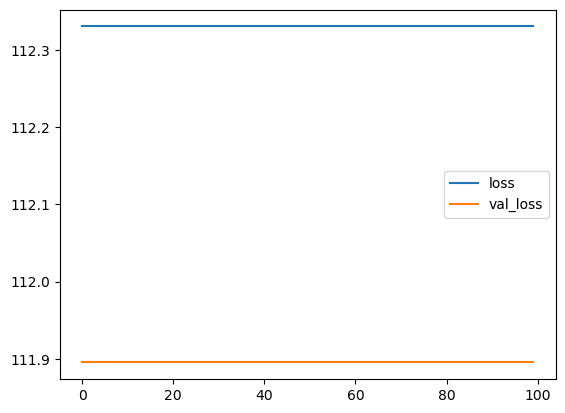

In [7]:
new_col = [col for col in cols if col not in leak_cols]

#model time
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=[len(new_col)]),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='relu')
])

model.compile(
    optimizer="adam",
    loss="mae",
)

#skip this for the moment idk man
data_pipe = Pipeline(steps=[('preprocessor', preprocess),
                              ('model', model)
                             ])

y = matchups['A_PTS']
X = matchups.drop(['H_TEAM_ID','A_TEAM_ID','A_PTS'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = X_train[new_col].copy()
X_test = X_test[new_col].copy()


# data_pipe.fit(X_train, y_train,
# model__validation_data=(X_test, y_test),
# model__batch_size=512,
# model__epochs=100,
# )

trained = model.fit(X_train, y_train,
validation_data=(X_test, y_test),
batch_size=512,
epochs=100,
)

#preds = data_pipe.predict(X_test)
train_df = pd.DataFrame(trained.history)
train_df.loc[:,['loss','val_loss']].plot()


